In [1]:
import numpy as np

# CONDIÇÕES DE FRONTEIRA

def f_1(x): # LEFT
    return 0

def f_2(x): # RIGHT
    return 200*x

def f_3(x): # TOP
    return 200*x

def f_4(y): # BOTTOM
    return 0

# EQ DE POISSON (Δu = f_0(x,y))

def f_0(x,y):
    return 0

# 

def part(N, tmin, tmax):
    h = (tmax - tmin)/N
    
    t = np.zeros(N+1)
    for i in range(len(t)):
        t[i] = tmin + i*h
    
    return t, h

# CONSTANTES

xmin = 0
xmax = 0.5
ymin = 0
ymax = 0.5

n = 9
m = 9

x,h = part(n+1, xmin, xmax)
y,k = part(m+1, ymin, ymax)

v = k**2/h**2
l = 2*(v + 1)


# SOLUÇÃO INICIAL
SOLUTION = np.zeros((m+2,n+2))

SOLUTION[0:,0] = np.flip(f_1(y))
SOLUTION[0:,n+1] = np.flip(f_2(y))
SOLUTION[0,0:] = f_3(x)
SOLUTION[m+1,0:] = f_4(x)

# CONSTRUÇÃO DA MATRIZ DE COEFICIENTES
L_BLOCK = np.zeros((n,n))
for i in range (len(L_BLOCK)):
    L_BLOCK[i,i] = l
    if i-1 >= 0:
        L_BLOCK[i,i-1] = -1
        
    if i+1 < len(L_BLOCK):
        L_BLOCK[i,i+1] = -1
        

MATRIX = np.zeros((m*n,m*n))
for i in range(len(MATRIX)//len(L_BLOCK)):
    MATRIX[0+n*i:n+n*i,0+n*i:n+n*i] = L_BLOCK
    
    
M_BLOCK = -v*np.eye(n) 
for i in range(len(MATRIX)//len(M_BLOCK)):
    if i == 0:
        MATRIX[0:n,n:2*n] = M_BLOCK
        
    elif i == len(MATRIX)//len(M_BLOCK) - 1:
        MATRIX[i*n:(i+1)*n,(i-1)*n:i*n] = M_BLOCK
        
    else:
        MATRIX[i*n:(i+1)*n,(i+1)*n:(i+2)*n] = M_BLOCK
        MATRIX[i*n:(i+1)*n,(i-1)*n:i*n] = M_BLOCK

# CONSTRUÇÃO DA MATRIZ DE COEFICIENTES
B = np.zeros((m*n, 1))
for k in range(m):
    C = np.zeros((n, 1))
    for i in range(n):
        if k == 0:
            C[i] += v * SOLUTION[k, i+1]
            
        if k == m - 1:
            C[i] += v * SOLUTION[k+2, i+1]
            
        if i == 0:
            C[i] += SOLUTION[k+1, 0]
            
        if i == n - 1:
            C[i] += SOLUTION[k+1, n+1]
            
    B[k*n:(k+1)*n] = C
    
F = np.zeros((n*m,1))
for j in range(m):
    C = np.zeros((n,1))
    for i in range(n):
        C = f_0(x[i], y[j])
        
    F[j*n:(j+1)*n] = C
    
    
F *= -h**2
B += F    
    
# print(SOLUTION)
# print(MATRIX)
# print(B)

K = np.linalg.solve(MATRIX,B)
X = np.reshape(K,(m,n))

SOLUTION[1:m+1,1:n+1] = X

print(SOLUTION)



[[  0.  10.  20.  30.  40.  50.  60.  70.  80.  90. 100.]
 [  0.   9.  18.  27.  36.  45.  54.  63.  72.  81.  90.]
 [  0.   8.  16.  24.  32.  40.  48.  56.  64.  72.  80.]
 [  0.   7.  14.  21.  28.  35.  42.  49.  56.  63.  70.]
 [  0.   6.  12.  18.  24.  30.  36.  42.  48.  54.  60.]
 [  0.   5.  10.  15.  20.  25.  30.  35.  40.  45.  50.]
 [  0.   4.   8.  12.  16.  20.  24.  28.  32.  36.  40.]
 [  0.   3.   6.   9.  12.  15.  18.  21.  24.  27.  30.]
 [  0.   2.   4.   6.   8.  10.  12.  14.  16.  18.  20.]
 [  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]]


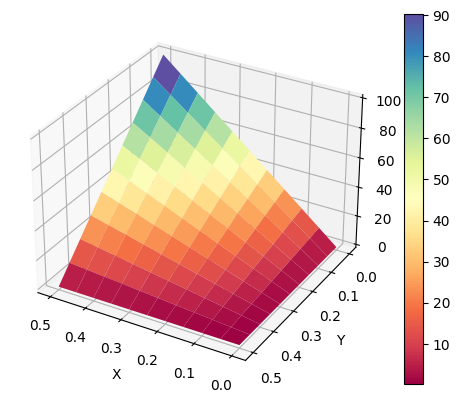

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

rows, cols = SOLUTION.shape
x = np.linspace(xmin, xmax, cols)
y = np.linspace(ymin, ymax, rows)
X, Y = np.meshgrid(x, y)

# Plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, SOLUTION, cmap='Spectral')

# Set the viewing angle (elevation, azimuth)
ax.view_init(elev=30, azim=120)

# Add labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Add a color bar which maps values to colors.
fig.colorbar(surf)

plt.show()

--------

In [77]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def part(N, tmin, tmax):
    h = (tmax - tmin)/N
    
    t = np.zeros(N+1)
    for i in range(len(t)):
        t[i] = tmin + i*h
    
    return t, h

def solucao_eq_eliptica(top_function, bottom_function, left_function, right_function, function, n, m, xmin, xmax, ymin, ymax, name=None, sol_exata=None):
    def f_1(x):
        f_1 = eval(left_function)
        return f_1
    
    def f_2(x):
        f_2 = eval(right_function)
        return f_2
    
    def f_3(x):
        f_3 = eval(top_function)
        return f_3
    
    def f_4(x):
        f_4 = eval(bottom_function)
        return f_4
    
    def f_0(x,y):
        f_0 = eval(function)
        return f_0
    
    x,h = part(n+1, xmin, xmax)
    y,k = part(m+1, ymin, ymax) 
    
    v = k**2/h**2
    l = 2*(v + 1)
    
    # SOLUÇÃO INICIAL
    SOLUTION = np.zeros((m+2,n+2))

    SOLUTION[0:,0] = np.flip(f_1(y))
    SOLUTION[0:,n+1] = np.flip(f_2(y))
    SOLUTION[0,0:] = f_3(x)
    SOLUTION[m+1,0:] = f_4(x)

    # CONSTRUÇÃO DA MATRIZ DE COEFICIENTES
    L_BLOCK = np.zeros((n,n))
    for i in range (len(L_BLOCK)):
        L_BLOCK[i,i] = l
        if i-1 >= 0:
            L_BLOCK[i,i-1] = -1
            
        if i+1 < len(L_BLOCK):
            L_BLOCK[i,i+1] = -1
            

    MATRIX = np.zeros((m*n,m*n))
    for i in range(len(MATRIX)//len(L_BLOCK)):
        MATRIX[0+n*i:n+n*i,0+n*i:n+n*i] = L_BLOCK
        
        
    M_BLOCK = -v*np.eye(n) 
    for i in range(len(MATRIX)//len(M_BLOCK)):
        if i == 0:
            MATRIX[0:n,n:2*n] = M_BLOCK
            
        elif i == len(MATRIX)//len(M_BLOCK) - 1:
            MATRIX[i*n:(i+1)*n,(i-1)*n:i*n] = M_BLOCK
            
        else:
            MATRIX[i*n:(i+1)*n,(i+1)*n:(i+2)*n] = M_BLOCK
            MATRIX[i*n:(i+1)*n,(i-1)*n:i*n] = M_BLOCK

    # CONSTRUÇÃO DA MATRIZ DE COEFICIENTES
    B = np.zeros((m*n, 1))
    for k in range(m):
        C = np.zeros((n, 1))
        for i in range(n):
            if k == 0:
                C[i] += v * SOLUTION[k, i+1]
                
            if k == m - 1:
                C[i] += v * SOLUTION[k+2, i+1]
                
            if i == 0:
                C[i] += SOLUTION[k+1, 0]
                
            if i == n - 1:
                C[i] += SOLUTION[k+1, n+1]
                
        B[k*n:(k+1)*n] = C
        
    F = np.zeros((n*m,1))
    for j in range(m):
        C = np.zeros((n,1))
        for i in range(n):
            C = f_0(x[i], y[j])
            
        F[j*n:(j+1)*n] = C
        
        
    F *= -h**2
    B += F 
    
    K = np.linalg.solve(MATRIX,B)
    X = np.reshape(K,(m,n))

    SOLUTION[1:m+1,1:n+1] = X
    
    # print(MATRIX)
    # print(B)
    
    # PLOTAGEM DOS PONTOS
    
    rows, cols = SOLUTION.shape
    x = np.linspace(xmin, xmax, cols)
    y = np.linspace(ymin, ymax, rows)
    X, Y = np.meshgrid(x, y)

    # Plot
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    surf = ax.plot_surface(X, Y, SOLUTION, cmap='Spectral')

    # Set the viewing angle (elevation, azimuth)
    ax.view_init(elev=30, azim=135)

    # Add labels
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    # Add a color bar which maps values to colors.
    # fig.colorbar(surf)

    if name is not None:
        plt.savefig(f"{name}.pdf", bbox_inches='tight')
    plt.show()

    Xr, Yr = np.meshgrid(x,y)
    
    if sol_exata is not None:
        def u(x,y):
            u = eval(sol_exata)
            return u
                
        R = u(Xr, Yr)
        T = np.zeros(R.shape)

        for i in range(len(R)):
            T[i] = R[len(R) -1 - i]
            
        print(f"ERRO ::: {np.linalg.norm(abs(SOLUTION - T), 2)}")
        print(T)
        SOL = abs(SOLUTION - T)
        for i in range(len(SOL)):
            for j in range(len(SOL[0])):
                if SOL[i,j] < 0:
                    print(f"{SOL[i,j]:.5f} ", end='&')
                else:
                    print(f" {SOL[i,j]:.5f} ", end='&')
        
            print()
    
    return SOLUTION

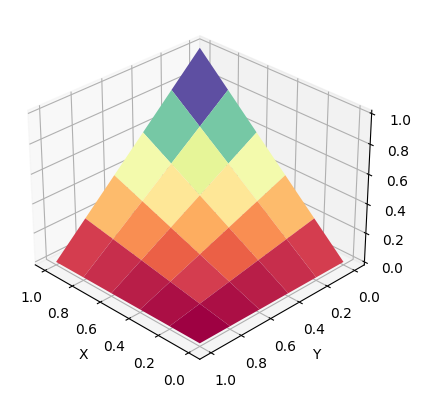

ERRO ::: 1.83692702048924e-16
[[0.   0.2  0.4  0.6  0.8  1.  ]
 [0.   0.16 0.32 0.48 0.64 0.8 ]
 [0.   0.12 0.24 0.36 0.48 0.6 ]
 [0.   0.08 0.16 0.24 0.32 0.4 ]
 [0.   0.04 0.08 0.12 0.16 0.2 ]
 [0.   0.   0.   0.   0.   0.  ]]
 0.00000 & 0.00000 & 0.00000 & 0.00000 & 0.00000 & 0.00000 &
 0.00000 & 0.00000 & 0.00000 & 0.00000 & 0.00000 & 0.00000 &
 0.00000 & 0.00000 & 0.00000 & 0.00000 & 0.00000 & 0.00000 &
 0.00000 & 0.00000 & 0.00000 & 0.00000 & 0.00000 & 0.00000 &
 0.00000 & 0.00000 & 0.00000 & 0.00000 & 0.00000 & 0.00000 &
 0.00000 & 0.00000 & 0.00000 & 0.00000 & 0.00000 & 0.00000 &
[[0.   0.2  0.4  0.6  0.8  1.  ]
 [0.   0.16 0.32 0.48 0.64 0.8 ]
 [0.   0.12 0.24 0.36 0.48 0.6 ]
 [0.   0.08 0.16 0.24 0.32 0.4 ]
 [0.   0.04 0.08 0.12 0.16 0.2 ]
 [0.   0.   0.   0.   0.   0.  ]]


In [79]:

# 12.1 2
# print(solucao_eq_eliptica("np.log(x**2 + 1)", "2*np.log(x)", "np.log(x**2 + 1)", "np.log(x**2 + 4)", "0", 2, 2, 1, 2, 0, 1, sol_exata="np.log(x**2 + y**2)"))

# 12.1 3a
print(solucao_eq_eliptica("x", "0", "0", "x", "0", 4, 4, 0, 1, 0, 1, name="12.1_3a", sol_exata="x*y"))

# 12.1 3b
# print(solucao_eq_eliptica("0", "np.cos(x)", "np.cos(x)", "-np.cos(x)", "-np.cos(x-y) - np.cos(x-y)", 4, 4, 0, np.pi, 0, 0.5*np.pi, name="12.1_3b", sol_exata="np.cos(x)*np.cos(y)"))